In [4]:
#Import Libiraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, SimpleRNN,LSTM, BatchNormalization
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# the data, split between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
#reshap data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [6]:
x_train=x_train.reshape(60000, 28, 28)
x_train=x_train / 255.0 #Standardising
x_test = x_test.reshape(10000, 28, 28)
x_test=x_test/255.0 #Standardising

modell = tf.keras.Sequential([
  tf.keras.Input(shape=(28,28)),
  tf.keras.layers.GRU(128),
  tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
  tf.keras.layers.Dropout(0.2,input_shape=(128,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

modell.summary()

modell.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
def scheduler(epoch, lr):
      if epoch < 8:
        return lr
      else:
        return lr * tf.math.exp(-0.1)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]
trainer=modell.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=20,callbacks=my_callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               60672     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 78,474
Trainable params: 78,474
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 64s 33ms/step - loss: 0.4084 - accuracy: 0.8646 - val_loss: 0.1251 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 2/20
1875/1875 [===

313/313 - 3s - loss: 0.0548 - accuracy: 0.9838 - 3s/epoch - 9ms/step
Loss :  0.054837603121995926
Acc : 98.37999939918518


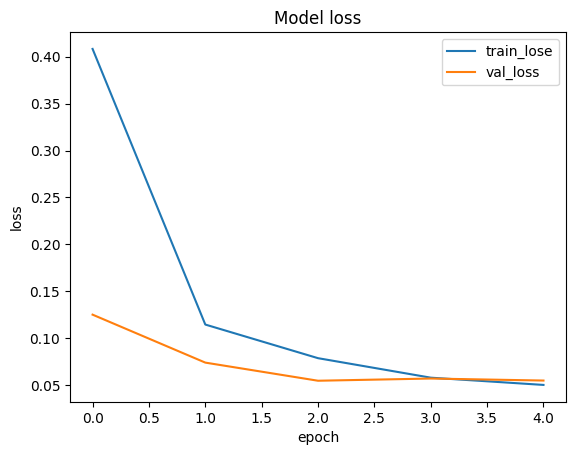

In [7]:
loss, accuracy =modell.evaluate(x_test, y_test, verbose=2)
print('Loss : ', loss)
print('Acc :', accuracy*100)

plt.plot(trainer.history['loss'])
plt.plot(trainer.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_lose', 'val_loss'])
plt.show()